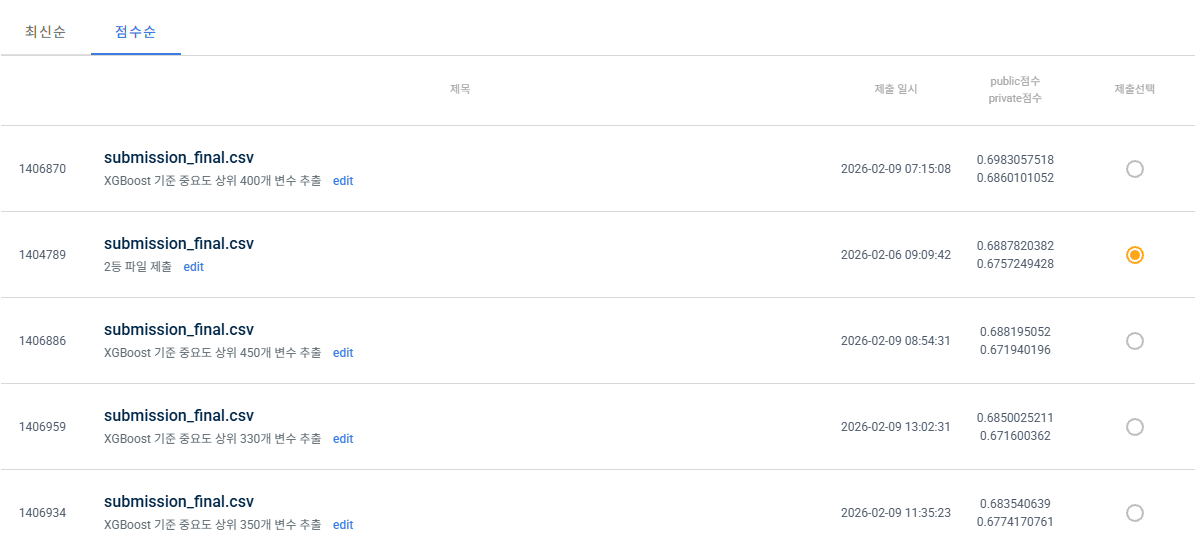

### 📊 2등 코드 변수 개수별 성능 및 편차 비교

| 변수 개수 | Public 점수 | Private 점수 | 점수 편차 (Gap) | 비고 |
| :--- | :--- | :--- | :--- | :--- |
| **300개** | 0.6887 | 0.6757 | 0.0130 | 2등 파일 제출 건 |
| **350개** | 0.6835 | 0.6774 | 0.0061 | |
| **400개** | **0.6983** | **0.6860** | 0.0123 | **현재 최고 성능** |
| **450개** | 0.6881 | 0.6719 | 0.0162 | |

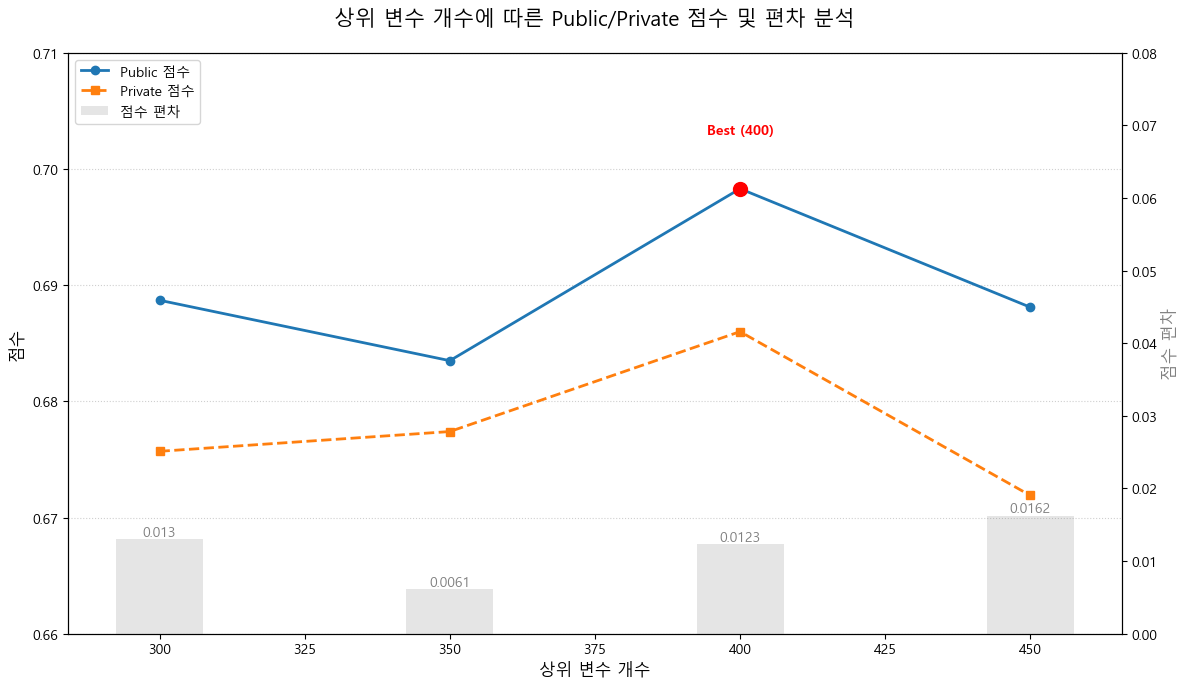

In [16]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 설정
features = [300, 350, 400, 450]
public_scores = [0.6887, 0.6835, 0.6983, 0.6881]
private_scores = [0.6757, 0.6774, 0.6860, 0.6719]
gaps = [round(pub - pri, 4) for pub, pri in zip(public_scores, private_scores)]

fig, ax1 = plt.subplots(figsize=(12, 7))

# 1. 왼쪽 축: Public/Private 점수 (선 그래프)
line1 = ax1.plot(features, public_scores, marker='o', color='#1f77b4', label='Public 점수', linewidth=2)
line2 = ax1.plot(features, private_scores, marker='s', color='#ff7f0e', label='Private 점수', linewidth=2, linestyle='--')
ax1.set_xlabel('상위 변수 개수', fontsize=12)
ax1.set_ylabel('점수', fontsize=12)
ax1.set_ylim(0.66, 0.71) # 점수 범위를 적절히 조절

# 2. 오른쪽 축: 점수 편차 (막대 그래프)
ax2 = ax1.twinx()
bars = ax2.bar(features, gaps, color='gray', alpha=0.2, label='점수 편차', width=15)
ax2.set_ylabel('점수 편차', fontsize=12, color='gray')
ax2.set_ylim(0, 0.08) # 점수 편차 범위를 조절하여 막대가 너무 높지 않게 설정

# 수치 표시 (점수 편차 값)
for i, gap in enumerate(gaps):
    ax2.text(features[i], gap + 0.0005, f'{gap}', ha='center', color='gray', fontsize=10)

# 최고점 강조
ax1.scatter(400, 0.6983, color='red', s=100, zorder=5)
ax1.annotate('Best (400)', (400, 0.6983), xytext=(400, 0.703), ha='center', weight='bold', color='red')

# 합쳐진 범례 만들기
lines = line1 + line2 + [bars]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('상위 변수 개수에 따른 Public/Private 점수 및 편차 분석', fontsize=15, pad=20)
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

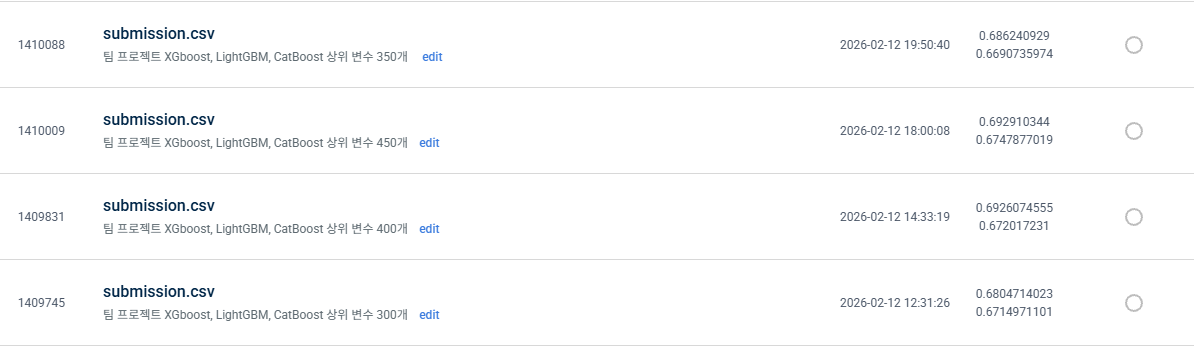

##### 데이터 분석 결과
* 300개 : 변수 350개를 썼을 때보다 Public 점수가 오히려 더 높습니다. 이는 변수를 줄이는 것이 노이즈가 섞인 변수가 생기는 것을 방지하여 모델의 복잡도를 낮추어 더 나은 일반화 성능을 낸 것으로 확인됩니다. 하지만, Private 점수는 350개 일 때가 더 높으므로, 300개 모델은 Public 리더보드에 약간 더 유리하다는 것을 확인할 수 있습니다.
* 350개 : 점수 편차가 0.0061로 가장 작습니다. 이는 Public 점수와 Private 점수가 매우 유사하므로 모델이 매우 안정적이며, 신뢰도 높은 모델임을 뜻합니다.
* 400개(최적의 지점) : 400개 지점에서 Public/Private 모두 정점을 찍습니다. 이는 350개에서 400개로 늘어날 때 추가된 50개의 변수들이 모델의 예측력을 높이는 핵심적인 유의미한 정보(Signal)가 많이 추가되었기 때문입니다.
* 450개(과적합) : 450개를 썼을 때 오히려 점수가 하락하는 것을 확인할 수 있습니다. 특히, 점수 편차가 0.0162로 가장 큽니다. 이는 중요도가 낮은 변수들이 추가되면서 모델이 학습 데이터의 노이즈까지 학습하게 되었고, 이로 인해 새로운 데이터(Public/Private)에 대한 대응 능력이 떨어졌기 때문입니다.

### 📊 우리 팀 코드 변수 개수별 성능 및 편차 비교

| 변수 개수 | Public 점수 | Private 점수 | 점수 편차 (Gap) | 비고 |
| :--- | :---: | :---: | :---: | :--- |
| 300개 | 0.6805 | 0.6715 | 0.0090 | |
| 350개 | 0.6862 | 0.6691 | 0.0172 | |
| 400개 | 0.6926 | 0.6720 | 0.0206 | |
| **450개** | **0.6929** | **0.6748** | **0.0181** | **현재 최고 성능** |

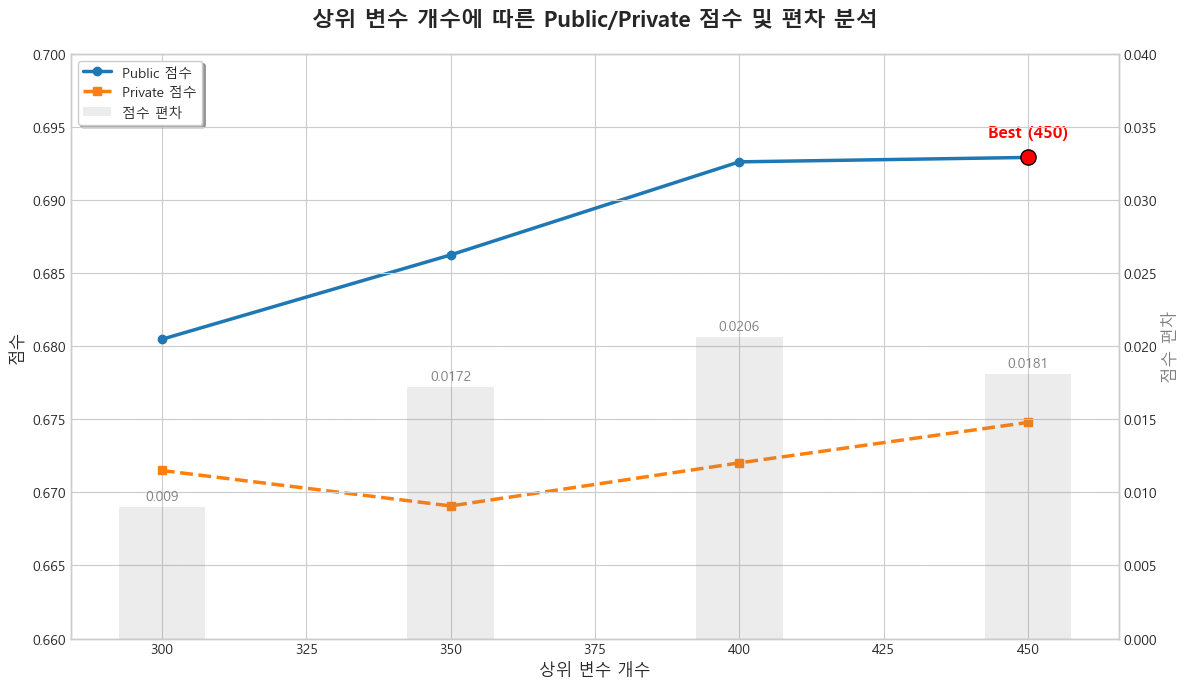

In [14]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준 - 환경에 따라 'AppleGothic' 등으로 변경 가능)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 이미지에서 추출한 실제 데이터 설정
features = [300, 350, 400, 450]
public_scores = [0.6804714023, 0.686240929, 0.6926074555, 0.692910344]
private_scores = [0.6714971101, 0.6690735974, 0.672017231, 0.6747877019]

# Public과 Private의 차이(Overfitting 지표) 계산
gaps = [round(pub - pri, 4) for pub, pri in zip(public_scores, private_scores)]

fig, ax1 = plt.subplots(figsize=(12, 7))

# 2. 왼쪽 축: Public/Private 점수 (선 그래프)
line1 = ax1.plot(features, public_scores, marker='o', color='#1f77b4', label='Public 점수', linewidth=2.5)
line2 = ax1.plot(features, private_scores, marker='s', color='#ff7f0e', label='Private 점수', linewidth=2.5, linestyle='--')
ax1.set_xlabel('상위 변수 개수', fontsize=12)
ax1.set_ylabel('점수', fontsize=12)
ax1.set_ylim(0.66, 0.70) # 데이터 범위에 맞춰 조정

# 3. 오른쪽 축: 점수 편차 (막대 그래프)
ax2 = ax1.twinx()
bars = ax2.bar(features, gaps, color='gray', alpha=0.15, label='점수 편차', width=15)
ax2.set_ylabel('점수 편차', fontsize=12, color='gray')
ax2.set_ylim(0, 0.04) # 편차를 보기 쉽게 범위 조정

# 수치 표시 (점수 편차 값)
for i, gap in enumerate(gaps):
    ax2.text(features[i], gap + 0.0005, f'{gap}', ha='center', color='gray', fontsize=10)

# 최고점 강조 (이미지 데이터 상 450개가 Best)
best_idx = 3 # 450개 데이터 위치
ax1.scatter(features[best_idx], public_scores[best_idx], color='red', s=120, zorder=5, edgecolors='black')
ax1.annotate(f'Best ({features[best_idx]})', 
             (features[best_idx], public_scores[best_idx]), 
             xytext=(0, 15), textcoords='offset points',
             ha='center', weight='bold', color='red', fontsize=12)

# 범례 통합
lines = line1 + line2 + [bars]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=True, shadow=True)

plt.title('상위 변수 개수에 따른 Public/Private 점수 및 편차 분석', fontsize=16, pad=20, weight='bold')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

##### 데이터 분석 결과
* 300개 : 점수 자체는 다른 실험군에 비해 낮지만, 점수 편차(0.0090)가 가장 작습니다. 이는 모델이 과적합되지 않고 매우 안정적임을 뜻하며, 2등 파일을 기록했을 만큼 탄탄한 일반화 성능을 보여줍니다.
* 350개 ~ 400개 : 변수 개수가 늘어남에 따라 Public 점수가 가파르게 상승합니다. 300개에서 400개로 넘어오며 추가된 변수들이 모델의 예측력을 높이는 유의미한 정보(Signal)를 포함하고 있음을 알 수 있습니다. 다만, 이 과정에서 점수 편차(Gap)가 함께 커지는 것으로 보아 모델의 복잡도도 동시에 증가하고 있습니다.
* 450개(최적의 지점) : Public(0.6929)과 Private(0.6748) 점수 모두에서 정점을 찍는 **스위트 스팟(Sweet Spot)**입니다. 특히 고무적인 부분은 400개일 때보다 변수는 늘었음에도 불구하고 **점수 편차는 오히려 감소(0.0206 → 0.0181)**했다는 점입니다. 이는 450개까지의 변수 조합이 노이즈를 효과적으로 억제하면서도 데이터의 본질적인 패턴을 가장 잘 설명하고 있음을 시사합니다.